In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor , RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score
import joblib

## Regression

In [3]:
df = pd.read_csv("Datasets/Admission_Predict.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
df.shape

(400, 9)

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
df = df.drop('Serial No.', axis=1)

In [14]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [17]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

In [21]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
288,314,104,4,5.0,5.0,9.02,0
44,326,113,5,4.5,4.0,9.40,1
361,334,116,4,4.0,3.5,9.54,1
60,309,100,2,3.0,3.0,8.10,0
34,331,112,5,4.0,5.0,9.80,1
...,...,...,...,...,...,...,...
380,322,104,3,3.5,4.0,8.84,1
310,320,104,3,3.0,3.5,8.74,1
389,320,108,3,3.5,4.0,8.44,1
43,332,117,4,4.5,4.0,9.10,0


In [22]:
y_train

288    0.82
44     0.91
361    0.93
60     0.48
34     0.94
       ... 
380    0.78
310    0.76
389    0.76
43     0.87
215    0.93
Name: Chance of Admit , Length: 360, dtype: float64

In [23]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
223,308,109,2,3.0,4.0,8.45,0
145,320,113,2,2.0,2.5,8.64,1
146,315,105,3,2.0,2.5,8.48,0
366,320,104,3,3.5,4.5,8.34,1
268,327,113,4,4.5,5.0,9.14,0
109,304,103,5,5.0,4.0,8.64,0
144,325,112,2,3.0,3.5,8.96,1
344,295,96,2,1.5,2.0,7.34,0
384,340,113,4,5.0,5.0,9.74,1
148,339,116,4,4.0,3.5,9.80,1


In [24]:
y_test

223    0.71
145    0.81
146    0.75
366    0.74
268    0.83
109    0.68
144    0.80
344    0.47
384    0.96
148    0.96
209    0.68
149    0.79
300    0.62
193    0.94
56     0.64
118    0.47
54     0.70
261    0.71
79     0.46
243    0.76
283    0.80
13     0.62
313    0.67
242    0.70
357    0.68
214    0.94
96     0.48
195    0.78
233    0.64
19     0.62
212    0.95
290    0.58
140    0.84
255    0.79
269    0.77
266    0.72
39     0.48
287    0.89
163    0.68
37     0.58
Name: Chance of Admit , dtype: float64

In [25]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[-0.27370657, -0.56307475,  0.76873273, ...,  1.72613693,
         0.68942933, -1.12434467],
       [ 0.78770491,  0.92135339,  1.63626809, ...,  0.61349719,
         1.33942197,  0.88940698],
       [ 1.49531256,  1.41616277,  0.76873273, ...,  0.05717732,
         1.57889295,  0.88940698],
       ...,
       [ 0.25699917,  0.09667109, -0.09880264, ...,  0.61349719,
        -0.3026647 ,  0.88940698],
       [ 1.31841065,  1.58109923,  0.76873273, ...,  0.61349719,
         0.82626989, -1.12434467],
       [ 1.14150873,  1.41616277,  1.63626809, ...,  1.16981706,
         1.27100169,  0.88940698]])

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [33]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = svm.predict(X_test)
y_pred4 = gbr.predict(X_test)

In [34]:
s1 = r2_score(y_test, y_pred1)
s2 = r2_score(y_test, y_pred2)
s3 = r2_score(y_test, y_pred3)
s4 = r2_score(y_test, y_pred4)
print(s1, s2, s3, s4)

0.8308190192100198 0.7567020565645791 0.6237695302977976 0.7576329399952384


In [35]:
final_data = pd.DataFrame({'Model':['LR','RF','SVM','GBR'],
                           'R2_Score':[s1, s2, s3, s4]})
final_data

,Model,R2_Score
0,LR,0.830819
1,RF,0.756702
2,SVM,0.623770
3,GBR,0.757633


<Axes: xlabel='Model', ylabel='R2_Score'>

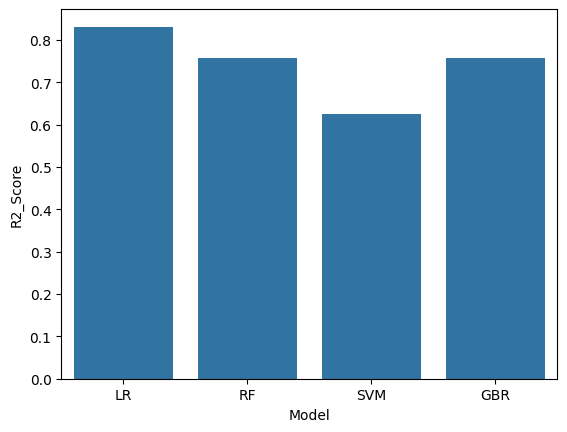

In [37]:
sns.barplot(data=final_data, x='Model',y='R2_Score')

## Classification

In [38]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
y_train = [1 if values > 0.8 else 0 for values in y_train]
y_test = [1 if values > 0.8 else 0 for values in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [41]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [46]:
log = LogisticRegression()
log.fit(X_train,y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

svmc = SVC()
svmc.fit(X_train,y_train)

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)


y_pred1 = log.predict(X_test)
y_pred2 = rfc.predict(X_test)
y_pred3 = svmc.predict(X_test)
y_pred4 = gbc.predict(X_test)


s5 = accuracy_score(y_test, y_pred1)
s6 = accuracy_score(y_test, y_pred2)
s7 = accuracy_score(y_test, y_pred3)
s8 = accuracy_score(y_test, y_pred4)
print(s5, s6, s7, s8)

0.925 0.975 0.925 0.95


In [48]:
final_data2 = pd.DataFrame({'Model':['LOG','RFC','SVMC','GBC'],
                           'ACC_Score':[s5, s6, s7, s8]})
final_data2

,Model,ACC_Score
0,LOG,0.925
1,RFC,0.975
2,SVMC,0.925
3,GBC,0.950


<Axes: xlabel='Model', ylabel='ACC_Score'>

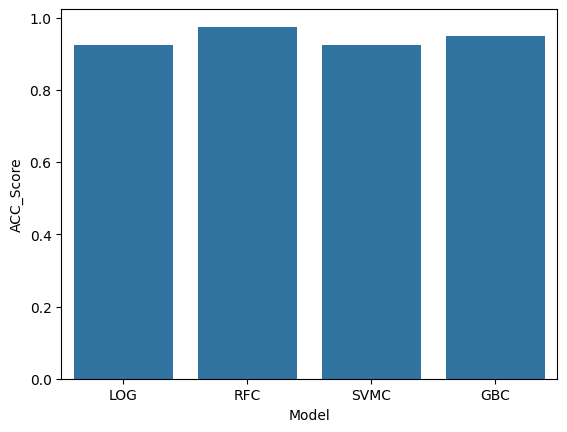

In [49]:
sns.barplot(data=final_data2, x='Model',y='ACC_Score')

In [50]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [54]:
y = [1 if values > 0.8 else 0 for values in y]
y = np.array(y)

In [55]:
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [56]:
X = sc.fit_transform(X)

In [58]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [59]:
gbc.fit(X,y)

GradientBoostingClassifier()

In [60]:
joblib.dump(gbr, 'joblib/grad_add_pred_joblib')

['grad_add_pred_joblib']